# Individual Project

Let's load the some data for TSLA. Unfortunately, this data is not quite as *clean* as our NVDA data, so we'll need to do some data wrangling. The file we're looking to load is `TSLA_2015_2024.csv`.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("ggplot")

### Data Retrieval

In [137]:
tickers = ["TSLA", "MSFT", "AMZN", "META", "NVDA", "INTC", "AAL", "UBER", "GOOGL", "PFE"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False, progress=False) # asjusted close price is more valuable because its after dividend 
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups) # here we need to use groups not data because of groups.append(data)
df
# Future warning is usually a change to a function or object that you have, here it is a change of argument 


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,TSLA,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,TSLA,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,TSLA,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,TSLA,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...,...
2024-12-23,PFE,25.783726,26.709999,26.750000,26.190001,26.360001,35350400
2024-12-24,PFE,25.812687,26.740000,26.770000,26.379999,26.590000,19716400
2024-12-26,PFE,25.638929,26.559999,26.719999,26.480000,26.639999,31406000


In [138]:
df.index = pd.to_datetime(df.index, dayfirst=True)
df

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,TSLA,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,TSLA,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,TSLA,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,TSLA,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...,...
2024-12-23,PFE,25.783726,26.709999,26.750000,26.190001,26.360001,35350400
2024-12-24,PFE,25.812687,26.740000,26.770000,26.379999,26.590000,19716400
2024-12-26,PFE,25.638929,26.559999,26.719999,26.480000,26.639999,31406000


### Data Cleaing

#### 1. Duplicates and missing values

In [139]:
print("Cleaning dataset of duplicates...")
df.drop_duplicates(inplace=True)
print("There are now", df.duplicated().sum(), "duplicates.")

print("Checking dataset of missing values...")
print("Missing data after cleaning", df.isnull().sum().sum())

Cleaning dataset of duplicates...
There are now 0 duplicates.
Checking dataset of missing values...
Missing data after cleaning 0


### 2. Save dataframe 

In [140]:
df.to_csv("Multi_clean.csv")
df

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,TSLA,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,TSLA,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,TSLA,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,TSLA,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...,...
2024-12-23,PFE,25.783726,26.709999,26.750000,26.190001,26.360001,35350400
2024-12-24,PFE,25.812687,26.740000,26.770000,26.379999,26.590000,19716400
2024-12-26,PFE,25.638929,26.559999,26.719999,26.480000,26.639999,31406000


#### 2. Data Reshaping and Exploration

Missing values after pivoting: 0

Head of Wide DataFrame
Ticker            AAL       AMZN      GOOGL       INTC        META  \
Date                                                                 
2020-01-02  28.982893  94.900497  68.026016  53.666470  208.635391   
2020-01-03  27.548195  93.748497  67.670158  53.013714  207.531464   
2020-01-06  27.219410  95.143997  69.473846  52.863762  211.440033   
2020-01-07  27.119778  95.343002  69.339645  51.981678  211.897507   
2020-01-08  27.737495  94.598503  69.833191  52.016953  214.045731   

Ticker            MSFT      NVDA        PFE       TSLA       UBER  
Date                                                               
2020-01-02  153.042297  5.971747  28.938540  28.684000  30.990000  
2020-01-03  151.136673  5.876163  28.783276  29.534000  31.370001  
2020-01-06  151.527298  5.900805  28.746302  30.102667  31.580000  
2020-01-07  150.145752  5.972245  28.650185  31.270666  32.810001  
2020-01-08  152.537308  5.983447  28.879383 

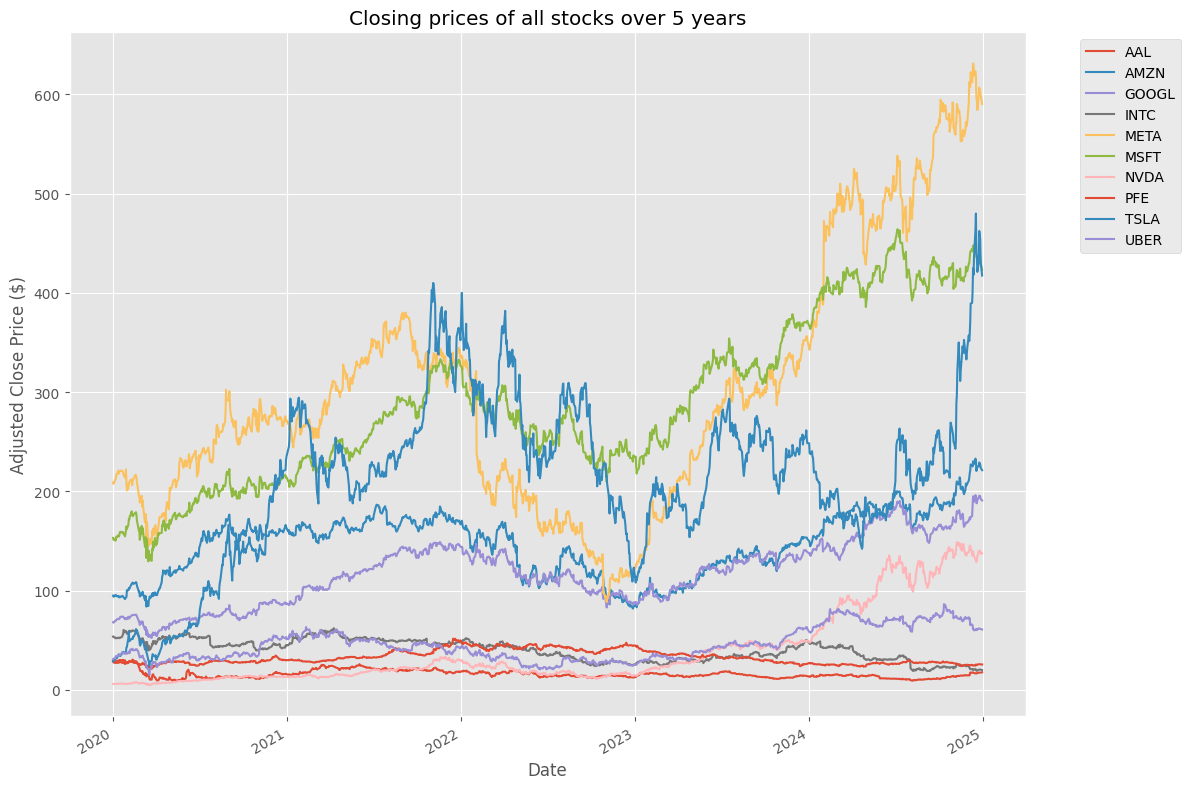

In [141]:
df_pivot = df.pivot_table(index=df.index, columns="Ticker", values="Adj Close")
df_pivot.index = pd.to_datetime(df_pivot.index, dayfirst=True)
df_pivot.sort_index(inplace=True)

# check for missing values 
print("Missing values after pivoting:", df_pivot.isnull().sum().sum())

print("\nHead of Wide DataFrame")
print(df_pivot.head())
print("\nTail of Wide DataFrame")
print(df_pivot.tail())

df_pivot.plot(figsize=(12,8), title="Closing prices of all stocks over 5 years")
plt.ylabel("Adjusted Close Price ($)")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


### 3. Backtesting

For each stock, implement and backtest a Bollinger Bands Mean Reversion strategy
Generate signals and positions as per the "A2 Strategies" document
Calculate the simple daily returns and the daily returns of your strategy
Display the end-of-period cumulative return for your strategy vs. buy+hold

In [ ]:
window = 20
    df['MA'] = df['Close'].rolling(window).mean()
    df['BB_Upper'] = df['MA'] + (2 * df['Close'].rolling(window).std())
    df['BB_Lower'] = df['MA'] - (2 * df['Close'].rolling(window).std())